<a href="https://colab.research.google.com/github/ElenaKapetanoudi/Machine-Learning-Exercise-3/blob/main/Ensemble_Models_%26_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [143]:
import yfinance as yf
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

## Set Up Data Frame

In [144]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0


In [145]:
input_df = df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], errors='ignore')
input_df


,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001


## Question 1

### Line Plot Creation

In [146]:
fig = px.line(df, x="Date", y=["Open", "High", "Low", "Close"], width=1000)
fig.show()


## Question 2

Γνωρίζουμε πως μη στατικές είναι οι χρονοσειρές που παρουσιάζουν μεταβολή του μέσου όρου των τιμών τους και η τυπική απόκλιση αλλάζει συνεχώς. Αντίθετα, στατικές είναι οι χρονοσειρές που η τιμή τους βρίσκεται κοντά στον μέσο όρο και η τυπική απόκλιση παραμένει ίδια. Από το διάγραμμα, συμπεραίνουμε ότι οι χρονοσειρές είναι μη στατικές, καθώς παρουσιάζουν μεγάλες μεταβολές των τιμών. Για παράδειγμα, στην αρχή έχουν μεγάλη και συνεχόμενη άνοδο, ενώ στη συνέχεια ανεβοκατεβαίνουν διαρκώς.


## Question 3

Γνωρίζουμε πως ένας Regressor προσπαθεί να βρει σταθερές σχέσεις μεταξύ των μεταβλητών για να προβλέψει την τιμή στόχο. Ωστόσο, όταν οι χρονοσειρές είναι μη στατικές σημαίνει ότι οι μεταβλητές είναι, επίσης, μη σταθερές με αποτέλεσματα να αλλάζουν και οι μεταξύ τους σχέσεις. Έτσι προκύπτει το πρόβλημα μείωσης της ικανότητας γενίκευσης του Regressor, καθώς θα αλλάξουν οι μεταβλητές και ο Regressor θα έχει εκπαιδευτεί με παλιές διαφορετικές τιμές. Συνεπώς, το μοντέλο θα πέσει στην περίπτωση της υπερπροσαρμογής (overfitting). Στο παράδειγμα μας, αν εκπαιδεύσουμε το μοντέλο στα πρώτα έτη (2021-2023), θα μάθει ότι η τιμή του δολαρίου ανεβαίνει και έτσι για τα επόμενα έτη θα προβλέψει ότι το δολάριο επίσης ανεβαίνει, ενώ στην πραγματικότητα η τιμή του πέφτει και έχει πολλές διακυμάνσεις. Συμπερασματικά, θα πρέπει να γίνει σταθεροποίηση των χρονοσειρών.

## Question 4

Σύμφωνα με άρθρα, το δολάριο έκλεισε το πρώτο εξάμηνο του 2025 με την μεγαλύτερη απώλεια από το 1973. Μεταξύ Ιουνίου και Ιουλίου 2025, αν και συνέχισε να βρίσκεται χαμηλά, παρατηρήθηκαν κάποιες αυξήσεις που ανέκτησαν το 3.2%, οι οποίες οφείλονται σε καλύτερα από ότι προσδοκώμενα οικονομικά δεδομένα, όπως δημιουργία θέσεων απασχόλησης και πληθωρισμός. Ακόμη, αναφέρεται πως το δολάριο επηρεάστηκε από τις προσδοκίες για τα επιτόκια αλλά και τη γενική διεθνή οικονομική και πολιτική αβεβαιότητα.

## Question 5

Δεν είναι δυνατόν να προβλέψουμε με απόλυτη ακρίβεια την τιμή (close) του δολαρίου για την επόμενη μέρα, αν έχουμε ως πληροφορία τα σημερινά open, high, low, close. Αυτό συμβαίνει καθώς το δολάριο ως χρηματοκοοικονομική σειρά είναι μη στατική και επηρεάζεται από πολλούς και απρόβλεπτους εξωτερικούς παράγοντες. Συνεπώς, δεν υπάρχει σταθερή και απόλυτη αξιόπιστη συνάρτηση f που με δεδομένα τα σημερινά o,h,l και c να δίνει την αυριανή τιμή c. Ωστόσο, μπορούμε να δημιουργήσουμε μοντέλα πρόβλεψης τα οποία θα δώσουν μία εκτίμηση για την τιμή στόχο, η οποία εκτίμηση θα είναι πιθανή να πετύχει, αλλά όχι με βεβαιότητα.


## Question 6

Αρχικά, γνωρίζουμε ότι οι τιμές του δολαρίου αποτελούν χρονοσειρά που σημαίνει ότι υπάρχει χρονική εξάρτηση μεταξύ τους και οι παρελθοντικές τιμές επηρεάζουν τις μελλοντικές. Με τον τυχαίο διαχωρισμό, υπάρχει περίπτωση το μοντέλο να εκπαιδευτεί με μελλοντικές τιμές και έχουμε, συνεπώς, διαρροή δεδομένων (data leakage) με αποτέλεσμα το μοντέλο να έχει ψευδή υψηλή επίδοση. Άρα, δεν έχει νόημα ο τυχαίος διαχωρισμός των δεδομένων, αντίθετα, τα δεδομένα θα πρέπει να χωριστούν σε παρελθοντικές τιμές στο train set και μελλοντικές τιμες στο test set.

## Question 7

### Train & Test Sets Split

In [147]:
train_df = input_df[input_df['Date'].dt.year < 2024].copy()
test_df  = input_df[input_df['Date'].dt.year == 2024].copy()
print(train_df)
print(test_df)

                         Date        Open        High         Low       Close
0   2020-11-05 00:00:00-05:00   93.339996   93.550003   92.489998   92.529999
1   2020-11-06 00:00:00-05:00   92.570000   92.820000   92.180000   92.230003
2   2020-11-09 00:00:00-05:00   92.239998   92.959999   92.129997   92.730003
3   2020-11-10 00:00:00-05:00   92.760002   92.970001   92.599998   92.750000
4   2020-11-11 00:00:00-05:00   92.699997   93.209999   92.610001   93.040001
..                        ...         ...         ...         ...         ...
787 2023-12-22 00:00:00-05:00  101.760002  101.900002  101.430000  101.699997
788 2023-12-26 00:00:00-05:00  101.650002  101.769997  101.449997  101.470001
789 2023-12-27 00:00:00-05:00  101.550003  101.570000  100.830002  100.989998
790 2023-12-28 00:00:00-05:00  100.870003  101.300003  100.620003  101.230003
791 2023-12-29 00:00:00-05:00  101.199997  101.419998  101.070000  101.330002

[792 rows x 5 columns]
                          Date        Op

### Date Removal From Data Frames

In [148]:
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])
print(train_df)
print(test_df)


           Open        High         Low       Close
0     93.339996   93.550003   92.489998   92.529999
1     92.570000   92.820000   92.180000   92.230003
2     92.239998   92.959999   92.129997   92.730003
3     92.760002   92.970001   92.599998   92.750000
4     92.699997   93.209999   92.610001   93.040001
..          ...         ...         ...         ...
787  101.760002  101.900002  101.430000  101.699997
788  101.650002  101.769997  101.449997  101.470001
789  101.550003  101.570000  100.830002  100.989998
790  100.870003  101.300003  100.620003  101.230003
791  101.199997  101.419998  101.070000  101.330002

[792 rows x 4 columns]
            Open        High         Low       Close
792   101.419998  102.250000  101.339996  102.199997
793   102.150002  102.730003  102.080002  102.459999
794   102.459999  102.529999  102.150002  102.419998
795   102.400002  103.099998  101.910004  102.410004
796   102.440002  102.620003  102.080002  102.209999
...          ...         ...      

## Question 8

### Numpy Arrays Creation Function

In [149]:
# Ορίζουμε την συνάρτηση με παραμέτρους ένα Dataframe και τον αριθμό των γραμμών του κάθε Timeframe
def create_timeframes(currentdf, N):

    # Ορίζουμε τους πίνακες
    X, y = [], []

    # Κρατάμε ασφαλές αντίγραφο του Dataframe
    currentdf = currentdf.copy()

    # Ορίζουμε τη μεταβλητή στόχο
    currentdf['Target'] = currentdf['Close'].shift(-1)
    currentdf = currentdf.dropna()

    # Δημιουργούμε ανάλογα Timeframe και Target με Ν γραμμές
    for i in range(len(currentdf) - N):
        # Δημιουργούμε τις γραμμές του Timeframe & το Target
        timeframe = currentdf.iloc[i:i+N][['Open','High','Low','Close']].values
        target = currentdf.iloc[i+N]['Target']
        X.append(timeframe)
        y.append(target)

    # Μετατρέπουμε τους πίνακες σε Numpy
    X = np.array(X)
    y = np.array(y)

    # Επιστρέφουμε τους Numpy Arrays
    return X, y


## Question 9

Για να προβλέψουμε την επόμενη μέρα, χρειάζεται να δώσουμε έμφαση στο βραχυπρόθεσμο, οπότε θα πρέπει το μέγεθος του timeframe N να είναι μικρό ούτως ώστε το μοντέλο να δίνει σημασία σε μικρό περιθώριο δεδομένων.Έτσι, το μοντέλο θα εστιάζει στο πιο πρόσφατο χρονικό διάστημα και θα έχει γρήγορη αντίδραση έναντι σε αλλαγές που συμβαίνουν καθημερινά και απρόβλεπτα.
Για να προβλέψουμε τον επόμενο μήνα, χρειάζεται να δώσουμε έμφαση στο μακρυπρόθεσμο, οπότε θα πρέπει το μέγεθος του timeframe N να είναι μεγάλο ούτως ώστε το μοντέλο να δίνει σημασία σε μεγάλο περιθώριο δεδομένων.Έτσι, το μοντέλο θα εστιάζει σε μεγαλύτερο χρονικό διάστημα και θα δίνει σημασία στην γενική τάση και στην εποχικότητα, ενώ θα αδιαφορεί για τυχόν θόρυβο που προκύπτει κάθε μέρα. Συνεπώς, όσο πιο μακρύα στον ορίζοντα θέλουμε να προβλέψουμε τόσο αυξάνουμε το Ν και το αντίστροφο.

## Question 10

### Time Frames Creation

In [150]:
x_train, y_train = create_timeframes(train_df, 5)
x_test, y_test = create_timeframes(test_df, 5)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(786, 5, 4) (786,)
(246, 5, 4) (246,)


### Time Frames Reshape

In [151]:
x_train = x_train.reshape(x_train.shape[0], 20)
x_test  = x_test.reshape(x_test.shape[0], 20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(786, 20) (786,)
(246, 20) (246,)


### Check Numpy Arrays Length

In [152]:
if len(x_train) == len(y_train) and len(x_test) == len(y_test):
    print(True)
else:
    print(False)

True


### Check Preprocessing

In [153]:
print(x_train[0])

[93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]


## Question 11

### Models' Creation

In [154]:
#Επειδή η εκφώνηση ζητάει και στο c και στο d το ίδιο πράγμα, αποφάσισα να δημιουργήσω μοντέλο και για το decision tree, αφού στο e χρησιμοποιείται και αυτό.
models = {
    "a) Linear Regression": LinearRegression(),
    "b) Random Forest Regressor": RandomForestRegressor(random_state=0, n_estimators=100),
    "c) Bagging Regressor": BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=0),
    "d) Decision Tree Regressor": DecisionTreeRegressor(random_state=0),
    "e) Stacking Regressor": StackingRegressor(estimators=[('linear', LinearRegression()), ('decision_tree', DecisionTreeRegressor(random_state=0))],final_estimator=LinearRegression())
}

### MAE Calculation

In [155]:
train_mae = []
test_mae = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_mae.append(mean_absolute_error(y_train, y_pred_train))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))

print(train_mae)
print(test_mae)

[0.49794437010924675, 0.1876284849249376, 0.4989414806964023, 0.0, 0.5231960659822822]
[0.39979012517482687, 0.47996557158183245, 0.39703253997539595, 0.6682115880454459, 0.40347777185508815]


### MAE by Model Plot

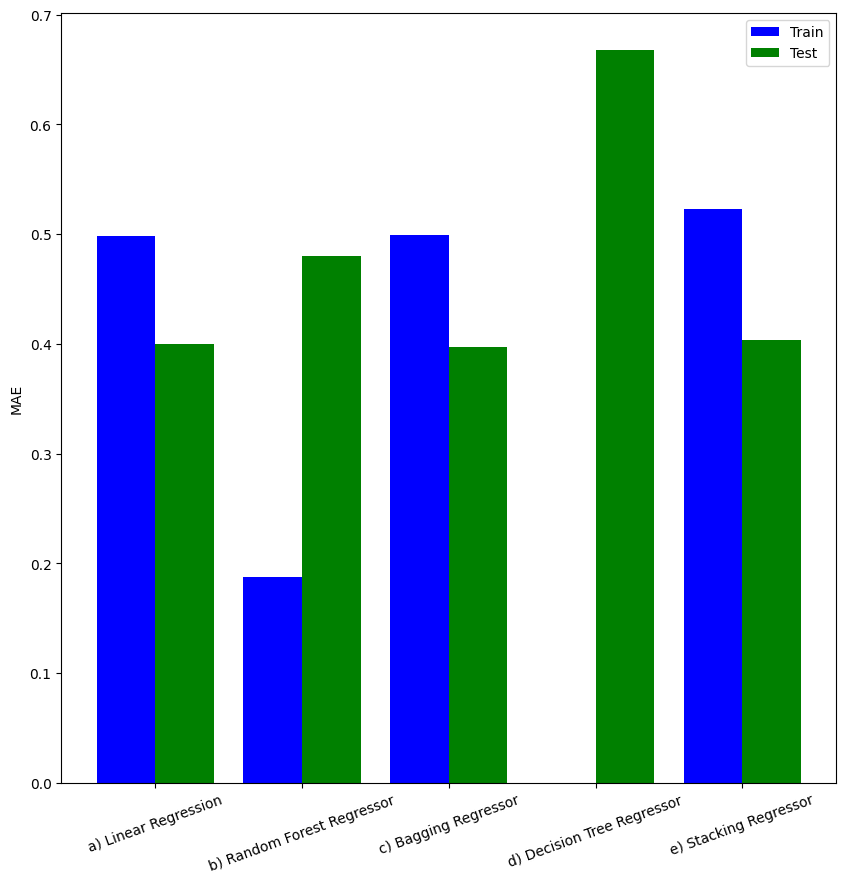

In [156]:
plt.figure(figsize=(10,10))
x_labels = list(models.keys())
x = np.arange(len(x_labels))

plt.bar(x - 0.2, train_mae, width=0.4, color='blue', label='Train')
plt.bar(x + 0.2, test_mae, width=0.4, color='green', label='Test')

plt.xticks(x, x_labels, rotation=20)
plt.ylabel("MAE")
plt.legend()
plt.show()

### Explanation

a)Το Linear Regression μαθαίνει μία γραμμική σχέση μεταξύ των χαρακτηριστικών και της τιμής στόχου και δημιουργεί μία συνάρτηση ευθείας γραμμής η οποία στοχεύει στην ελαχιστοποίηση του σφάλματος μεταξύ πραγματικών και προβλεπόμενων τιμών.

b) Ο Random Forest Regressor συνδυάζει πολλά Decision Trees που εκπαιδεύονται σε διαφορετικό σύνολο δεδομένων και παίρνει τον μέσο όρο των προβλέψεων αυτών των δέντρων απόφασης.

c) Ο Bagging Regressor δημιουργεί πολλά Linear Regression σε τυχαία δείγματα και παίρνει τον μέσο όρο των αποτελεσμάτων που προέρχονται από αυτά.

d) Το Decision Tree μαθαίνει μη γραμμικές σχέσεις καθώς χωρίζει τα δεδομένα σε κλαδιά ώστε να ελαχιστοποιεί το σφάλμα σε κάθε κόμβο.

e) Ο Stacking Regressor συνδυάζει διαφορετικούς Regressor και σταθμίζει τα αποτελέσματά τους για καλύτερη πρόβλεψη.

## Question 12

### Day & Month Addition

In [157]:
input_df['Day'] = input_df['Date'].dt.day
input_df['Month'] = input_df['Date'].dt.month
input_df

,Date,Open,High,Low,Close,Day,Month
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,5,11
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,6,11
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,9,11
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,10,11
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,11,11
...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,30,10
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,31,10
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,3,11
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,4,11


### Month Contribution

Ο μήνας ενδεχομένως θα συμβάλλει στην βελτίωση των προβλέψεων διότι το δολάριο χαρακτηρίζεται από εποχικότητα, δηλαδή αναλόγως τον μήνα αυξάνεται και μειώνεται η μεταβλητότητα του. Συνεπώς, αν γνωρίζουμε τον μήνα μπορούμε να βρούμε κάποια σχέση μεταξύ μήνα και μεταβλητότητας.

### Log Return Calculation

In [158]:
columns = ['Open', 'High', 'Low', 'Close']

df_log_returns = input_df.copy()
for col in columns:
    df_log_returns[col] = np.log(1 + df_log_returns[col].pct_change())
df_log_returns

,Date,Open,High,Low,Close,Day,Month
0,2020-11-05 00:00:00-05:00,NaN,NaN,NaN,NaN,5,11
1,2020-11-06 00:00:00-05:00,-0.008284,-0.007834,-0.003357,-0.003247,6,11
2,2020-11-09 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407,9,11
3,2020-11-10 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216,10,11
4,2020-11-11 00:00:00-05:00,-0.000647,0.002578,0.000108,0.003122,11,11
...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,0.004043,0.003617,0.003037,0.003119,30,10
1254,2025-10-31 00:00:00-04:00,0.003524,0.001203,0.005042,0.002709,31,10
1255,2025-11-03 00:00:00-05:00,0.002610,0.001501,0.002913,0.000701,3,11
1256,2025-11-04 00:00:00-05:00,0.002303,0.002697,0.000301,0.003498,4,11


### Log Return Histograms

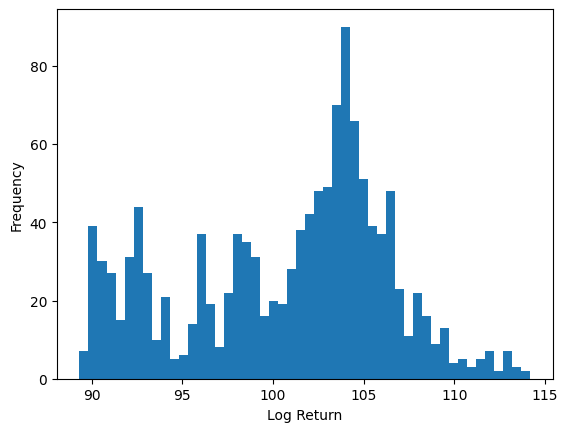

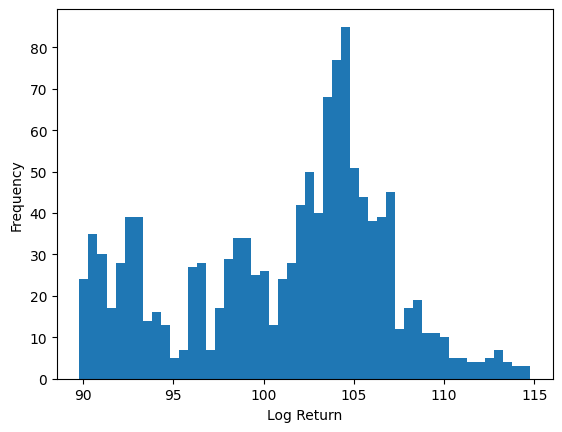

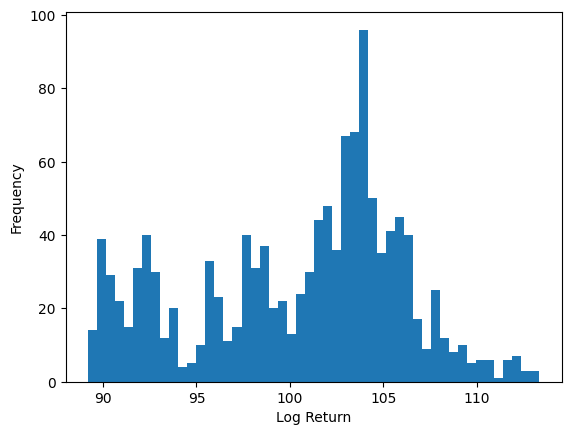

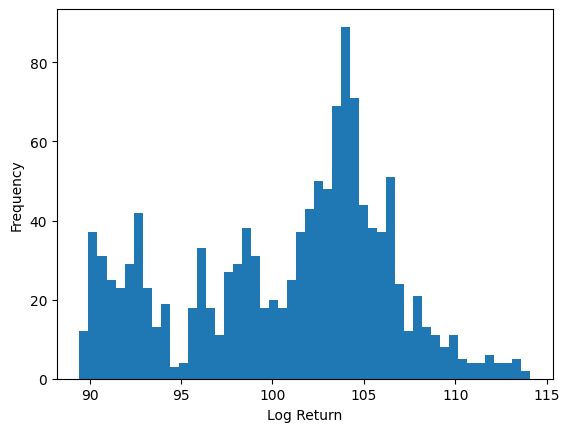

In [159]:
for c in columns:
    plt.figure()
    plt.hist(input_df[c], bins=50)
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.show()


### Log Return Contribution

Η φόρμουλα λογαριθμικών επιστροφών ενδεχομένως θα βελτιώσει τις προβλέψεις των μοντέλων διότι οι χρονοσείρες τους είναι περισσότερο στατικές το οποίο όπως εξηγήσαμε σε προηγούμενο ερώτημα βοηθά τα μοντέλα να κάνουν καλύτερη πρόβλεψη. Επιπλέον, αυτή η φόρμουλα μετατρέπει τις τιμές σε ποσοστιαίες μεταβολές έναντι των απόλυτων τιμών και μειώνεται η δράση των μεγάλων τιμών.

### Prediction Example

Αν κάποιο μοντέλο προβλέψει Ct+1=0.01, αυτό σημαίνει ότι η λογαριθμική μεταβολή είναι 0.01, δηλαδή Ct+1/Ct = e^0.01 = 1.01 και επομένως η τιμή αυξάνεται κατα 1% σε σχέση με την προηγούμενη μέρα. Οπότε αν η τιμή Ct είναι 0.95 δολάρια τότε η τιμή την επόμενη μέρα θα αυξηθεί ελαφρώς ως 0.95*1.01 = 0.9595.

### Train & Test Sets Split

In [160]:
train_df_log = df_log_returns[df_log_returns['Date'].dt.year < 2024].copy()
test_df_log  = df_log_returns[df_log_returns['Date'].dt.year == 2024].copy()
print(train_df_log)
print(train_df_log)

                         Date      Open      High       Low     Close  Day  \
0   2020-11-05 00:00:00-05:00       NaN       NaN       NaN       NaN    5   
1   2020-11-06 00:00:00-05:00 -0.008284 -0.007834 -0.003357 -0.003247    6   
2   2020-11-09 00:00:00-05:00 -0.003571  0.001507 -0.000543  0.005407    9   
3   2020-11-10 00:00:00-05:00  0.005622  0.000108  0.005089  0.000216   10   
4   2020-11-11 00:00:00-05:00 -0.000647  0.002578  0.000108  0.003122   11   
..                        ...       ...       ...       ...       ...  ...   
787 2023-12-22 00:00:00-05:00 -0.006172 -0.005383 -0.003052 -0.001376   22   
788 2023-12-26 00:00:00-05:00 -0.001082 -0.001277  0.000197 -0.002264   26   
789 2023-12-27 00:00:00-05:00 -0.000984 -0.001967 -0.006130 -0.004742   27   
790 2023-12-28 00:00:00-05:00 -0.006719 -0.002662 -0.002085  0.002374   28   
791 2023-12-29 00:00:00-05:00  0.003266  0.001184  0.004462  0.000987   29   

     Month  
0       11  
1       11  
2       11  
3       11 

### Data Removal From Data Frames

In [161]:
train_df_log = train_df_log.drop(columns=['Date'])
test_df_log = test_df_log.drop(columns=['Date'])
print(train_df_log)
print(train_df_log)


         Open      High       Low     Close  Day  Month
0         NaN       NaN       NaN       NaN    5     11
1   -0.008284 -0.007834 -0.003357 -0.003247    6     11
2   -0.003571  0.001507 -0.000543  0.005407    9     11
3    0.005622  0.000108  0.005089  0.000216   10     11
4   -0.000647  0.002578  0.000108  0.003122   11     11
..        ...       ...       ...       ...  ...    ...
787 -0.006172 -0.005383 -0.003052 -0.001376   22     12
788 -0.001082 -0.001277  0.000197 -0.002264   26     12
789 -0.000984 -0.001967 -0.006130 -0.004742   27     12
790 -0.006719 -0.002662 -0.002085  0.002374   28     12
791  0.003266  0.001184  0.004462  0.000987   29     12

[792 rows x 6 columns]
         Open      High       Low     Close  Day  Month
0         NaN       NaN       NaN       NaN    5     11
1   -0.008284 -0.007834 -0.003357 -0.003247    6     11
2   -0.003571  0.001507 -0.000543  0.005407    9     11
3    0.005622  0.000108  0.005089  0.000216   10     11
4   -0.000647  0.002578 

### Time Frames Creation

In [162]:
x_train_log, y_train_log = create_timeframes(train_df_log, 5)
x_test_log, y_test_log = create_timeframes(test_df_log, 5)
print(x_train_log.shape, y_train_log.shape)
print(x_test_log.shape, y_test_log.shape)



(785, 5, 4) (785,)
(246, 5, 4) (246,)


### Time Frames Reshape

In [163]:
x_train_log = x_train_log.reshape(x_train_log.shape[0], 20)
x_test_log  = x_test_log.reshape(x_test_log.shape[0], 20)
print(x_train_log.shape, y_train_log.shape)
print(x_test_log.shape, y_test_log.shape)

(785, 20) (785,)
(246, 20) (246,)


### Check Numpy Arrays Length

In [164]:
if len(x_train_log) == len(y_train_log) and len(x_test_log) == len(y_test_log):
    print(True)
else:
    print(False)

True


### Check Preprocessing

In [165]:
print(x_train_log[0])

[-0.00828359 -0.00783395 -0.00335732 -0.00324741 -0.00357126  0.00150715
 -0.0005426   0.00540659  0.00562168  0.00010759  0.00508853  0.00021562
 -0.0006471   0.00257813  0.00010801  0.00312182  0.0033386  -0.00075127
  0.00183395 -0.00086023]


### MAE Calculation

In [166]:
train_mae_log = []
test_mae_log = []

for name, model in models.items():
    model.fit(x_train_log, y_train_log)
    y_pred_train_log = model.predict(x_train_log)
    y_pred_test_log = model.predict(x_test_log)

    train_mae_log.append(mean_absolute_error(y_train_log, y_pred_train_log))
    test_mae_log.append(mean_absolute_error(y_test_log, y_pred_test_log))

print(train_mae_log)
print(test_mae_log)

[0.003420197109969349, 0.001354437803282162, 0.003423439600577503, 0.0, 0.0036407887042750387]
[0.002714998127252652, 0.0028613702231998013, 0.0026985697658109286, 0.0045137480281194145, 0.0027048436185341967]


### MAE By Model Plot

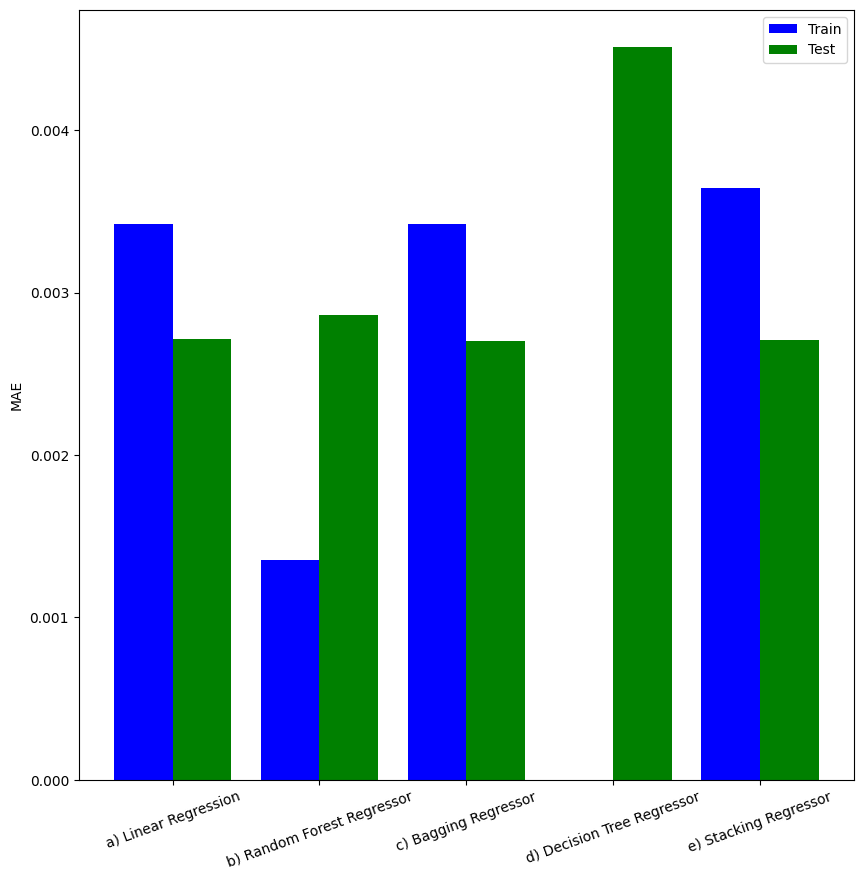

In [167]:
plt.figure(figsize=(10,10))
x_labels = list(models.keys())
x = np.arange(len(x_labels))

plt.bar(x - 0.2, train_mae_log, width=0.4, color='blue', label='Train')
plt.bar(x + 0.2, test_mae_log, width=0.4, color='green', label='Test')

plt.xticks(x, x_labels, rotation=20)
plt.ylabel("MAE")
plt.legend()
plt.show()

## Question 13

### Best Model

In [168]:
best_model_index = np.argmin(test_mae_log)
best_model_name = list(models.keys())[best_model_index]
best_model = list(models.values())[best_model_index]
print(best_model)

BaggingRegressor(estimator=LinearRegression(), random_state=0)


### Best Model Prediction

In [169]:
y_pred_log = best_model.predict(x_test_log)
y_pred_log

array([-1.23999211e-03,  3.64830630e-04, -6.48174704e-06,  9.49850179e-04,
       -1.80175184e-05, -1.01152004e-03, -6.80741580e-04,  8.28114729e-04,
        7.17484531e-04, -6.28903499e-04,  2.52988428e-04, -1.55884314e-04,
        1.35055465e-04, -4.57570914e-04,  7.11127585e-04,  8.03772045e-04,
        3.19502404e-04,  1.16224865e-04, -1.11584240e-03, -4.78596501e-04,
        6.47267947e-04,  7.17860114e-04, -3.82056902e-04, -4.31434361e-04,
        9.36959524e-04, -7.88985078e-04, -1.43781967e-04,  1.25849701e-03,
        2.83036588e-04, -7.43439542e-04,  6.37245981e-04, -2.59240437e-07,
        6.69768278e-05,  3.65022973e-04,  7.83247728e-05,  5.78281593e-04,
       -5.04544605e-04,  1.02196880e-03, -5.58926691e-04,  1.63505431e-04,
        4.48502956e-04,  7.84822809e-04, -2.77602532e-05, -2.41167401e-04,
        4.05329228e-04,  6.51552719e-04,  3.06420409e-05, -9.35826520e-04,
        3.97394804e-04,  3.20080556e-04,  2.73917934e-04,  2.98170108e-05,
       -8.50933350e-04, -

### Reverse Log Returns Calculation

In [170]:
last_close_before_test = input_df.loc[input_df['Date'] < '2024-01-01', 'Close'].iloc[-1]
actual_prices = [last_close_before_test]
predicted_prices = [last_close_before_test]
for r_true, r_pred in zip(y_test_log, y_pred_log):
    actual_prices.append(actual_prices[-1] * np.exp(r_true))
    predicted_prices.append(predicted_prices[-1] * np.exp(r_pred))
actual_prices = actual_prices[1:]
predicted_prices = predicted_prices[1:]

### Line Plot Creation

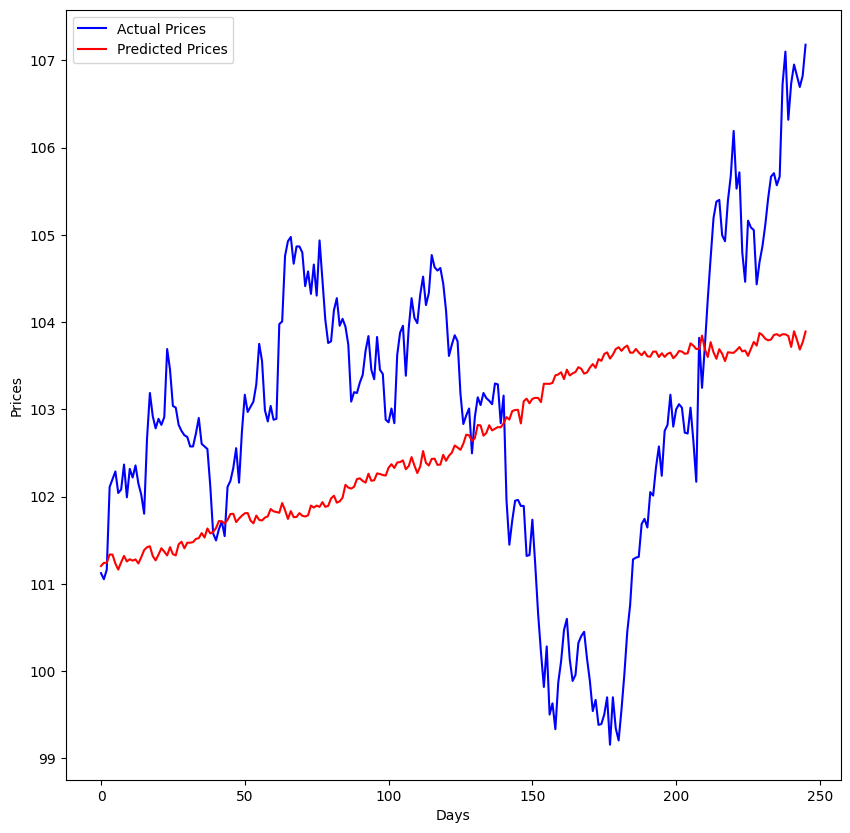

In [171]:
plt.figure(figsize=(10,10)),
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()